# ADVERSARIAL SEARCH

## Introduction
### What is Adversarial Search? Why do we need it?


Until this chapter, we have talked about single player games, but as we said in the first chapter, there is another type of game named Multi-agent games.
In this chapter, we will talk about multi-agent games in which two agents are against each other and one of them should beat the other. So, our search algorithm should return a <b>strategy of playing</b> instead of a chain of deterministic actions. 
We will have a brief talk about game theory and some famous games and their solutions, then we will talk about different kind of games and mostly zero-sum games and adversarial search on these games trees, and then we will work on this algorithm complexity improvements and using this algorithm on some real games with very big state spaces. So, Let’s Start!


## What is Game Theory?!


According to <a href="https://plato.stanford.edu/entries/game-theory/"> Stanford Encyclopedia of Philosophy </a>, Game theory is the study of the ways in which interacting choices of economic agents produce outcomes with respect to the preferences (or utilities) of those agents, where the outcomes in question might have been intended by none of the agents. It kinda seems familiar to us, since we are working on search algorithms which give a plan to our agent to choose a way and maximize his outcome. In other words, we can say that game theory is a great basis of AI. take a look at this <a href="https://www.artiba.org/blog/ai-and-game-theory-a-primer#:~:text=Game%20theory%20is%20a%20crucial%20element%20in%20building%20AI%20models%20today.&text=In%20reinforcement%20learning%2C%20multiple%20agents,considered%20as%20the%20most%20suitable.">brief article</a> for a little bit more information, and if you found this topic interesting, <a href="https://link.springer.com/chapter/10.1007/3-540-45634-1_4">this paper</a> will be a good source to learn more.

As we said before, the main difference between games search problems that we faced before, is that in the games we have an unpredictable opponent, and we should consider every move of the opponent; So we cannot only give a specific plan to our agent, but we need a strategy or policy.
At first we need to somehow formalize our problem and find a way to represent the problem to the computer and give back the strategy that it gives us. For this purpose, there are many different designs, but the notations of a good formalization could be like this:
<ul>
    <li>States: $S_i$, starting at $S_0$</li>
Every possible formation of the game, such as different set-ups of the chess board
    <li>Players: P = {1, …, N}</li>
For a N player game, notice that usually players take turns to play the game.
    <li>Actions: $A_i$</li>
Depending on the state that player is in, and players possible moves, a number of actions could be taken. (such as moving a soldier in chess)
    <li>Transition function: S x A -> S</li>
It’s a function that takes an state from states set and action from possible actions, and returns the result of applying the given action to the given state, that is a new state (such as the new setup after moving a soldier in the chess)
    <li>Terminal test: S -> {T, F}</li>
It takes a state, and says that if it is a terminal (final) state or not. (such as checking that weather a set-up in the chess board is in check-mate state or not)
    <li>Terminal utilities: S ✕ P -> R </li>
Takes a state and a player and says the player score (to be more precious, it returns the Utility of the player on that state, we will talk about Utility Function soon.)
    <li> Policy: S -> A </li>
Finally, the solution returned by our intelligent system is a function named Policy, that takes a state and tells us what action we should take.
</ul>


# Different type of games

One can look at the games in many different ways. One of the most important classifications is based on the <b>utility functions</b>. In simple words, every player in a game has different preferences, and by happening some conditions, will be satisfied more; so every player has a utility function that wants to maximize the value of this function for him/herself. For example, in a game like chess, only winning the game matters, so the utility function could simply return 1 for the winner, -1 for the loser and 0 for both players if the result was draw.
So based on the utility values for different players, games can be classified into 2 classes: Zero-Sum Games or General Games

## Zero-Sum Games:
In these types of games, agents have opposite utilities, so the game will be adversarial and there will be a pure competition. In this type of game, we can define a single variable named Value of the game that one player wants to maximize and the other one wants to minimize it. Games such as checkers and chess are zero-sum, since if you win (1 utility) other player loses (-1 utility).

## General Games:
Unlike zero-sum games, in these types of games every player has an independent utility. So based on the game play and different scenarios, players may cooperate, compete or be indifferent to each other to get a higher utility value.

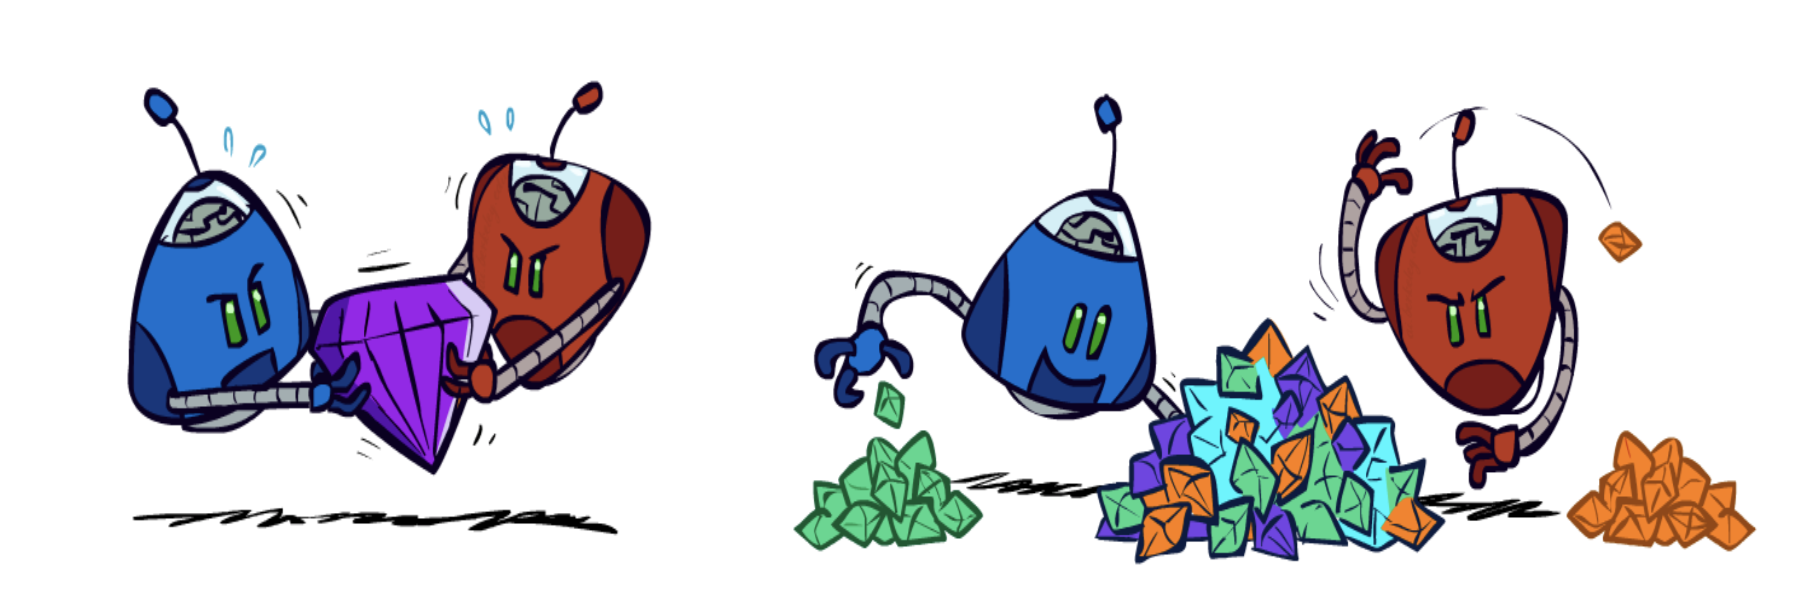


# Single Agent Trees
Assume that a game has one player (you can think about pac-man game without any ghosts). In each action our agent (pac-man) can move to left, right, up, or down. We simplify this game with constrainting pac-man move to left and right. For every terminal state, you can compute a score for the game (such as the number of seeds that pac-man has eaten). If we traverse the tree from down to top, at every state that pacman should choose between right and left, he will choose the one with higher score, and we will set the value of that state to this. So, value of a state is the best achievable utility (Score) from that state. In this way, we can compute all the scores from down to top and find the best path.

# Adversarial Game Trees
Now, assume that our simplified pac-man game has a ghost to, which is the opponent of our agent and assume this game is a zero-sum game, which means the utility of the ghost will be opposite of pac-man score. Again, we can draw the tree of the game, and every layer of the tree will be one of the players' turns.
Pac-man wants to maximize the score, and ghost wants to minimize it, so again if we traverse from down to up, in every state, if its pac-man turn it will choose the action which reaches the state with higher score and the ghost will choose the action which causes lower score; We call this strategy the MiniMax Strategy. In this way, both of them has played the best they could do, and if the other plays with this strategy, each player will have the best score it could take.

# Minimax Strategy
So the idea is that each player chooses a move to position with the highest minimax value (min value for one state and max value for the other one) and this will result in the best achievable payoff against best play. 
There is a convention, that we show the max player (the player who wants to maximize the score of the game) with upward triangle and the min player (the player who wants to minimize the score of the game) with downward triangle. 
A possible tree for an adversarial game is shown below:


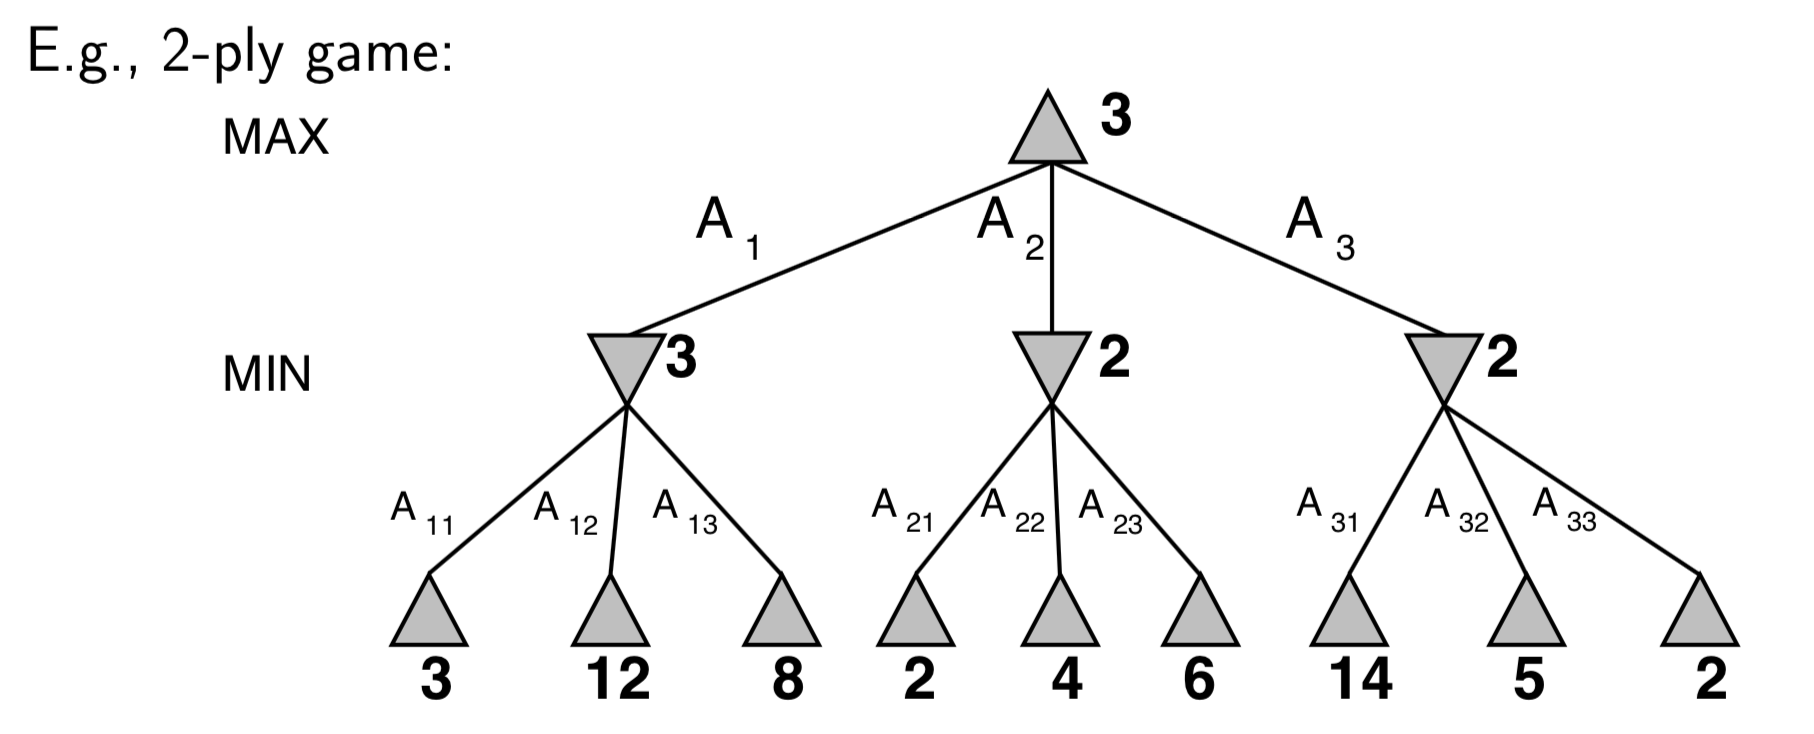

So, in this way, in adversarial games such as chess, checkers, and XO we can guarantee the best score we can get if the other player also plays the best he/she could; but if the other player does not play his/her move (not playing with minimax strategy) we may be able to reach a better score to but we will miss it with this strategy. For example in the recent example, in the marked state, if the MIN player is naive and choose the first action, score of that state will be 14, and if the max player is playing with the minimax strategy, it will choose first action and loses a great amount of score (3 instead of 14)
So, when we say “we can guarantee the draw in the XO game” it means that whatever the second player strategy is, if we play with the minimax strategy, we can avoid losing.
You can see the tree of the XO game below, and the score of the root of this tree will be 0.

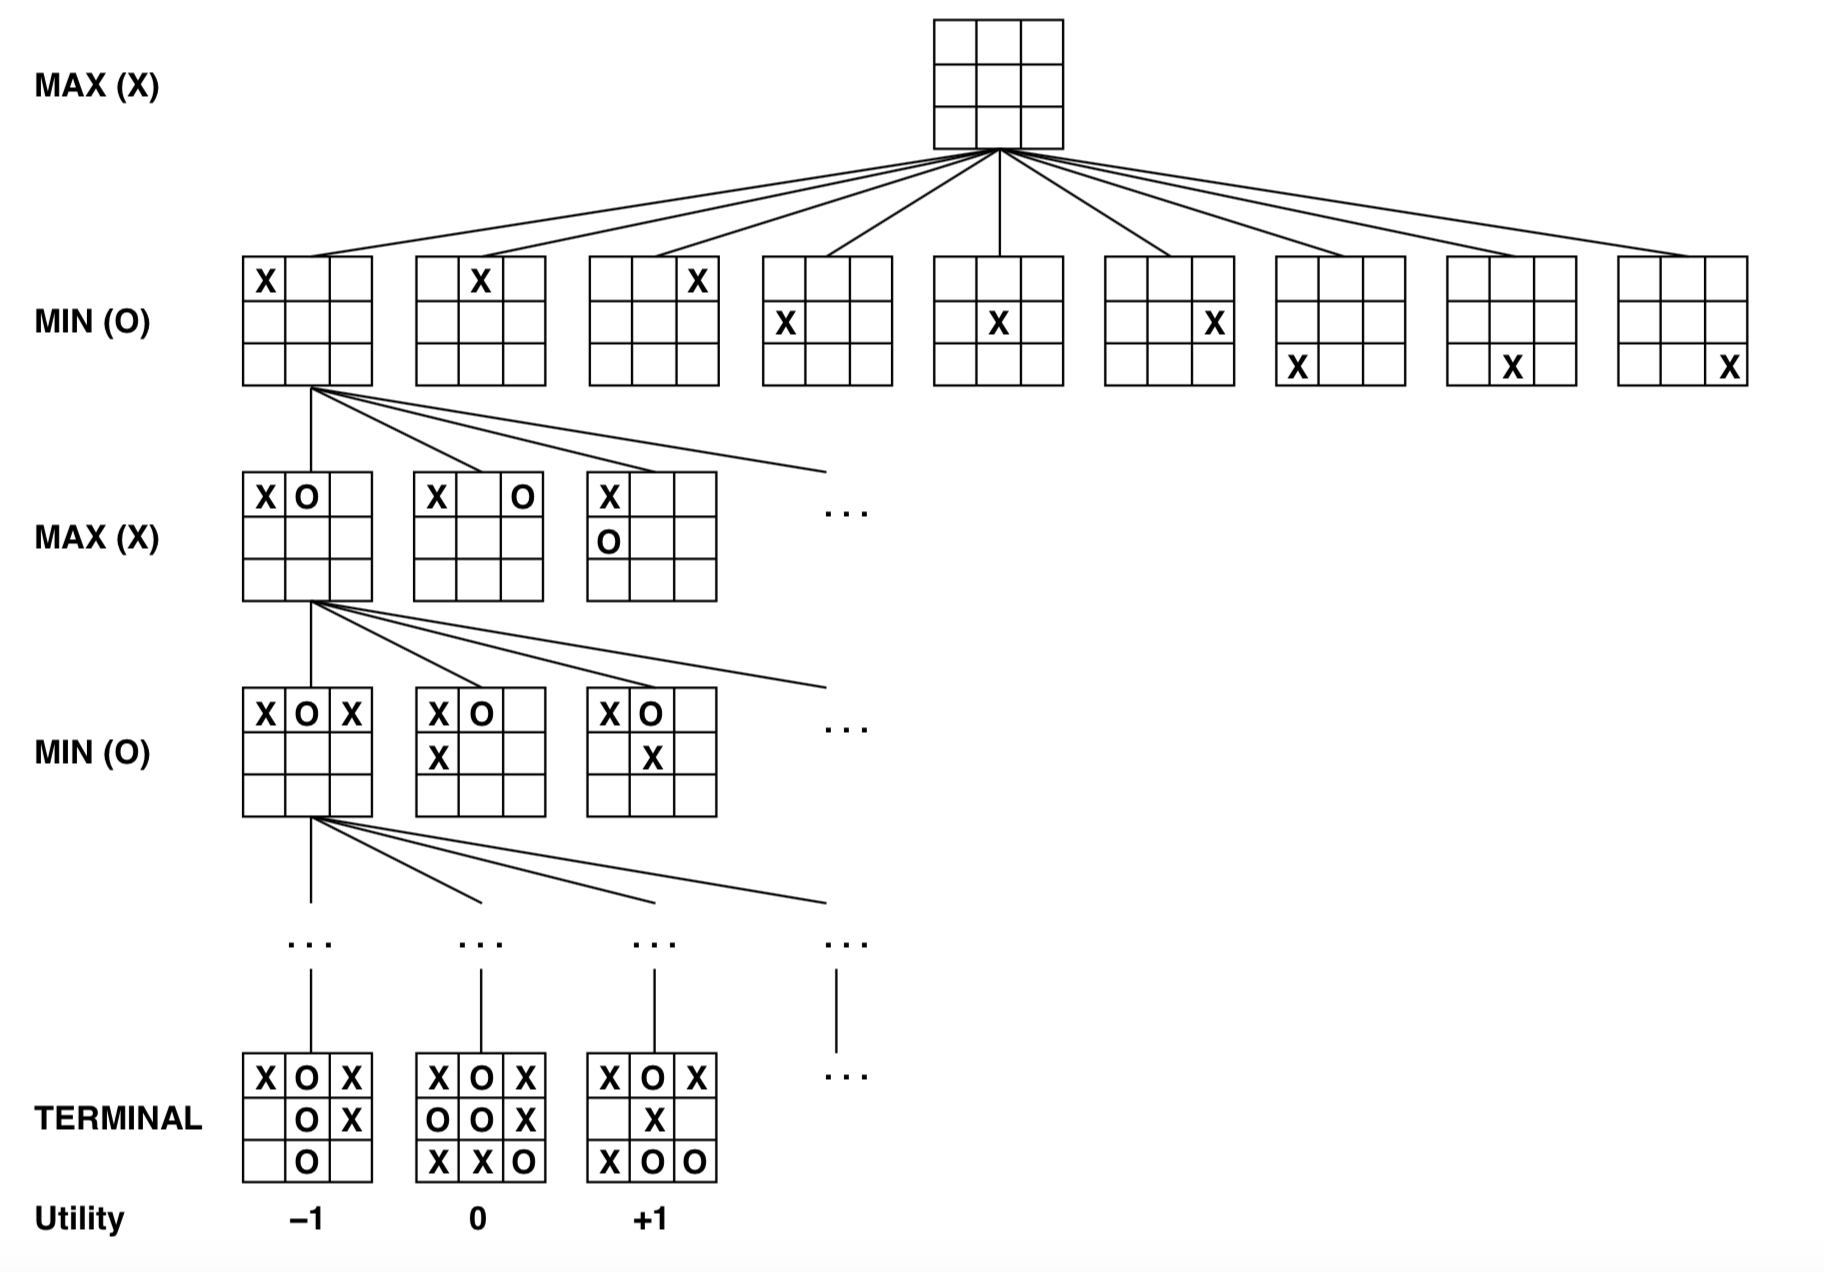

# Minimax Implementation (<a href="https://en.wikipedia.org/wiki/Minimax#Pseudocode"> Pseudocode </a>) :

# Properties of Minimax

## Is it complete?
If our adversarial search tree is finite (that means the game finishes in a finite time), since we will look at every possible state (with an algorithm like DFS) if there is an answer, we will reach it.

## Is it optimal?
As we said before, if the opponent plays with the minimax strategy too, this strategy will be optimal. But if the opponent is naive, this strategy may not be optimal.

## Time Complexity
 If the tree branching factor (number of childs for each node) is b, and the depth of tree is m, since we will examine every node, will be $O(b^m)$

## Space Complexity
We will need an algorithm like DFS, so space complexity will be $O(bm)$

### So it is a beautiful optimal algorithm, But…
For a game like chess that has a branching factor of about 35 and a tree with depth of about 100, this exact solution is completely infeasible, since time complexity will be from order of $ 35 ^ {100} $, which is an extraordinarily large number. So, we need to improve some pieces of minimax algorithm


# Resource Limits

Although the Minimax algorithm is optimal, in realistic games, a complete search to leaves is not feasible since it takes too much space. A considerable solution is to only search to a limited depth in the tree, but not only a depth-limited search is not necessarily optimal it also raises another problem: How can we determine the utility of non-terminal nodes without visiting the terminal nodes? The answer is to replace the utility function with an **evaluation function**.  which estimates the state’s utility. Such function should be designed particularly for a specific game and requires some knowledge of the game to achieve a decent estimation of who is more likely to win given a state of the game.


In games in which we have limited response time and an answer should be available at any time, an iterative-deepening algorithm can provide an *anytime solution*.


## Evaluation Functions


An ideal evaluation function returns the actual minimax value of a node. In that case, the algorithm is indeed optimal, otherwise, there is no guarantee for optimality. In practice, an evaluation function is typically a weighted linear sum of various features of the state. For example, in chess, we would have features for the number of white pawns, black pawns, white queens, black queens, or more complicated features like the number of white queens minus the number of black queens and so on. Therefore an evaluation function typically would look like this:



$Eval(s) = w_1f_1(s) + w_2f_2(s) + \ldots + w_nf_n(s)$


For now, we can suppose that the weights are constant and predetermined. Later on, in this course, we examine ways for learning how to improve these constants over time.


### Quality of the evaluation function

It is expected that a deeper depth-limited search provides better results even with a not so accurate evaluation function, that is because usually the closer we get to the terminal states, the easier becomes the evaluation of each state. As a general rule the deeper in the tree the evaluation function is buried, the less the quality of the evaluation function matters.


Nevertheless, a poor choice of the evaluation function can result in unpleasant effects especially in a shallow depth-limited search. Consider the simplified single-agent game of Pacman and its 2-depth tree illustrated in the figure below. Assume that the evaluation function is 10 times the number of eaten dots, so the estimated utility of nodes at depth two from left to right would 10, 0, and 10. Maximizing the evaluated numbers recursively leads to the value of 10 for both nodes of depth 1. 


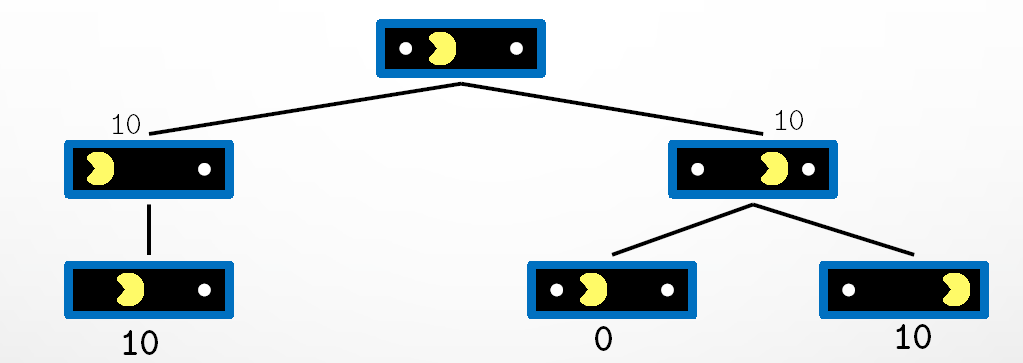

Therefore Pacman faces a tie between moving left or right. Suppose that Pacman chooses to move right in such a state. Now, again, Pacman runs a two-depth search and faces with another tie illustrated below.


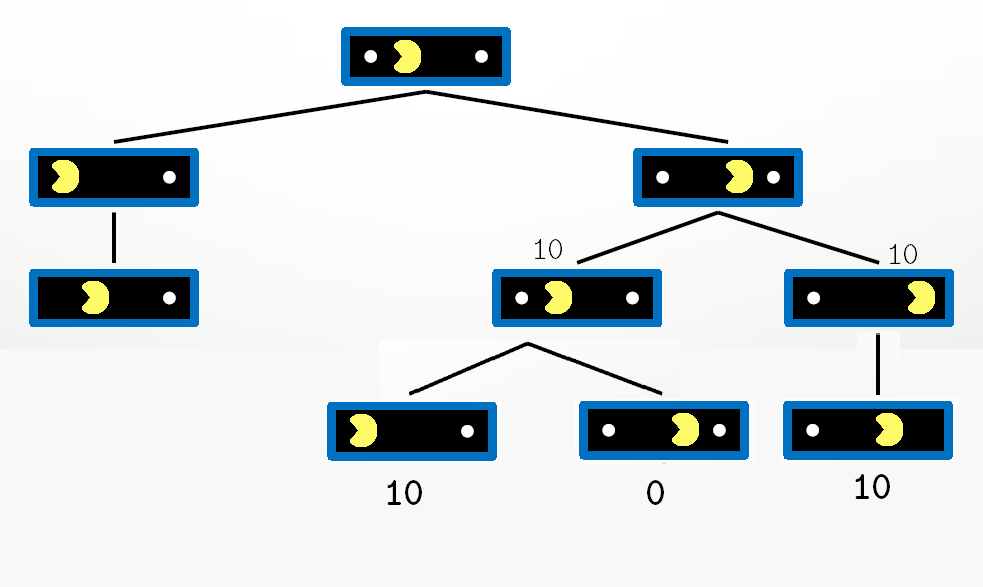

Suppose that Pacman chooses to move left in such a state. Now, Pacman has returned to the initial state, therefore, he will starve in a forever loop of going right and then left. From Pacman’s point of view, there are no point-scoring opportunities after eating the dot, moreover, eating a dot now seems to have no advantage over eating a dot later. This issue indicates a poor choice of the evaluation function. We can solve this issue by adding more features to the evaluation function (e.g. distance of Pacman to the nearest dot with a weight of -1) so that the evaluation function can distinguish between states with a higher resolution.


## Minimax Pruning



Do we have to visit every node in the tree to calculate the minimax values? The short answer is no. Some branches of the tree need not be visited in order to calculate their ancestors, in other words, those branches were **pruned** from the tree.


To better understand the idea consider the tree shown in the figure below. Suppose that the minimax algorithm searches the tree depth-first and from left to right. Assume that the algorithm has already fully examined the branch “a”, therefore, a value of 8 (minimum of 8 and 10) must be assigned to the node Y. Now continuing the search, suppose the minimax algorithm has just opened the node resulting from action “e” and starts backtracking to node Z to continue its search in branch “f”. But is there really a need to open any nodes of the “f” branch? Since we have found a child of value 4 for node Z, the value of node Z will not be more than 4. Furthermore, a definite value of 8 has already been assigned to Y, thus node Z  with a value of at most 4 will have no chance against node Y competing for the max value. Hence the first player will never choose action “d” and there is no need for further exploration of branch “d” so we can safely prune whatever node there is in branch “f”. Notice that we might not have been able to prune any nodes if the ordering of nodes was not in our favor.


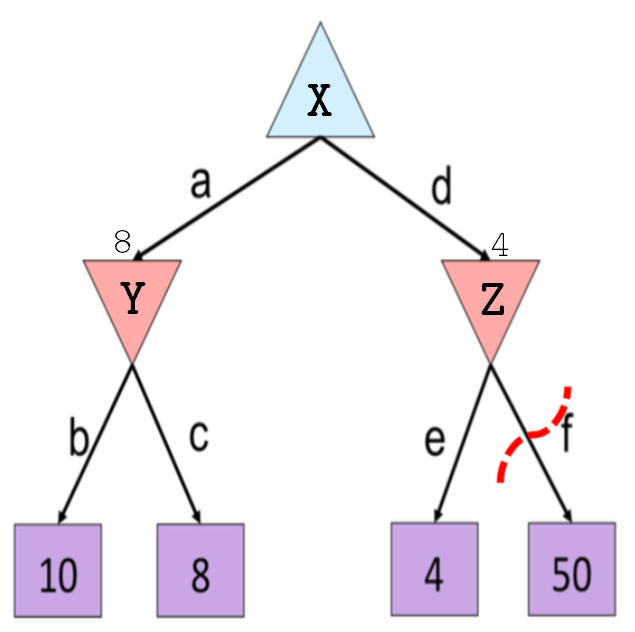

How can we generalize and organize this kind of inference and bring a decent algorithm out of it? Let’s say we’re computing the MIN-VALUE at some node n. Since n’s value would be the minimum value of its children, over time, the n’s value estimation will always be dropping or at least staying the same. Notice that n’s value affects the max nodes in the active path (current path from the root to n) *only if* it is large enough. Now let α be the best value that a MAX node gets at any choice point along the active path, if n’s value becomes worse than α, the MAX node will avoid it, so we can stop considering n’s other children. In other words, they’re already bad enough that they won’t be played.


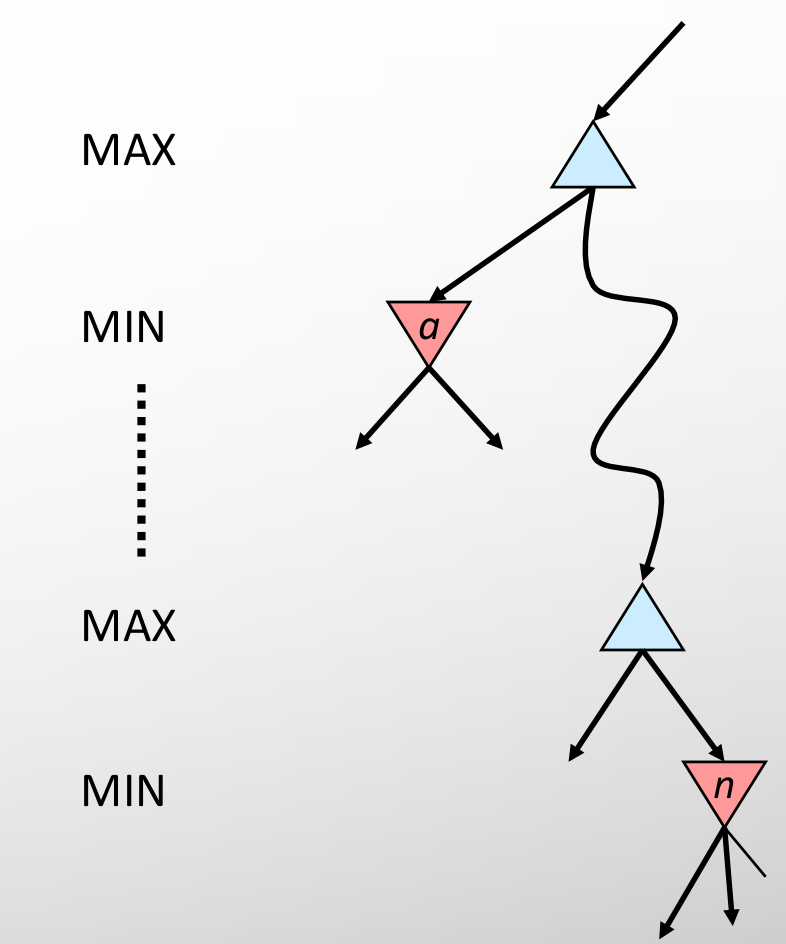

The argument will be symmetric when n is a MAX node and the best value in an active path is called β instead. This leads us to the **alpha-beta pruning algorithm** below which is a modification of the minimax search algorithm. α and β are respectively MAX nodes and MIN nodes best option on the path to root (the active path). 


***
***WARNING! NO BASE CASE IS IMPLEMENTED IN THE ALGORITHM ABOVE***
***

The two new lines in each function are marked. The first line is where the pruning actually happens. If the currently calculated value of the state, v, which is the minimum (maximum) value of its successors is worst (better) than α (β),no further search is required and v is returned. The second newly added line is used to update α and β in an active path. These two values are constantly passed between functions. As expected α is only updated in a MAX node and vice versa. Notice that α and β are not defined globally since they might be different in each active path and a node should only use the α and β value of its ancestors in the active path.


### Alpha-Beta Pruning Properties


It is notable that the pruning does not affect the minimax value computed for the root, however, values of the intermediate nodes might be wrong. This is uncertainty also applies to the children of the root hence this naive version of pruning can be problematic when it comes to action selection. Consider the tree in the figure below, the algorithm prunes the right-most branch and leaves the root node with two indistinguishable actions that only one of them is correct. One approach to solve this issue is tagging the nodes with exact aka definite values, so in the face of a tie, we can choose the exact node over the approximately calculated ones.


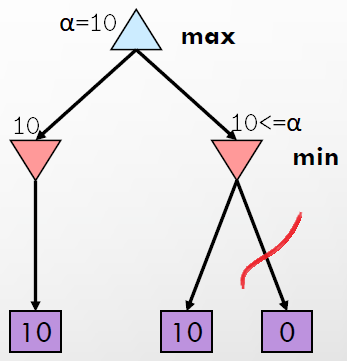

The effectiveness of the alpha-beta pruning algorithm depends on the nodes child ordering. As we will show, with a “perfect ordering” of children, for a branching factor of b and maximum tree depth of m, the time complexity drops to $O((2b)^{m/2})$ or more precisely $O\left((\sqrt{b}+0.5)^{m+1}\right)$. This means that given a fixed period of time, we can search the tree twice as deep as before. With a random ordering of child nodes, the total number of nodes examined will roughly be $O(b^{3m/4})$ for a moderate b.


#### Best Case Analysis of the Alpha-Beta pruning


It is easy to show that a “perfect ordering” that could give us the maximum pruning is an ordering in which MIN nodes’ children are ordered increasingly and MAX nodes’ children are ordered decreasingly based on their value. To analyze the complexity of the best-case scenario, notice that the value of some nodes has to be calculated precisely before a pruning could happen (See figure below). 


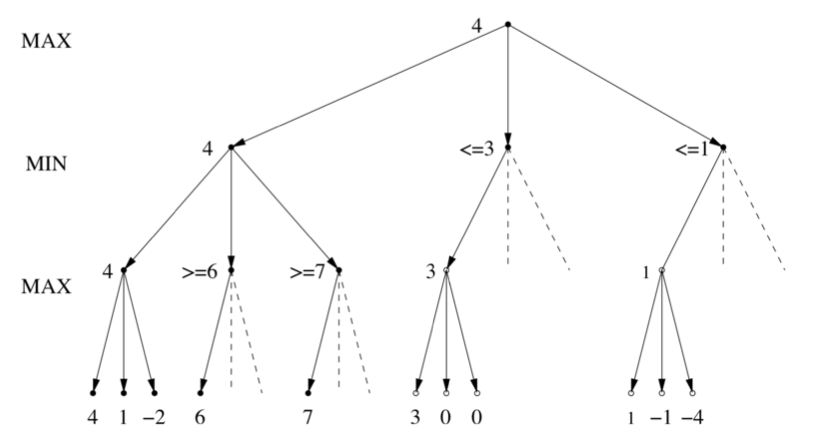

Knowing this fact we can find recursive patterns in the figure above as a general example. For any MAX node, the left-most child must be precisely calculated, and for its other children -which are going to be pruned- each should have the value of their left-most child precisely calculated. This observation leads to the following recursive formula:


$B_m = B_{m-1} + (b-1)B_{m-2}$

Writing the characteristic equation of the formula we have


$x^m = x^{m-1} + (b-1)x^{m-2}$

Dividing both sides by $x^{m-2}$ we obtain

$x^2 = x + (b-1)$

That means having $x_1$ and $x_2$ as two roots of the last equation, the genral form of $B_m$ would be

$B_m = c_1x^m + c_2x^m$,

where $c_1$ and $c_2$ are constants.
To calculate $x_1$ and $x_2$ we have

$x_1,x_2 = \frac{ 1\pm\sqrt{1+4(b-1)}}{2}=\frac{ 1\pm\sqrt{4b-3}}{2}\leq \frac{ 1\pm 2\sqrt{b}}{2}=0.5 \pm \sqrt{b}$

Continiuing this path leads to the time complexity of $O\left((\sqrt{b}+0.5)^{m+1}\right)$ for the alpha-beta pruning algorithm. We do not intend to further examine the details of this proof.

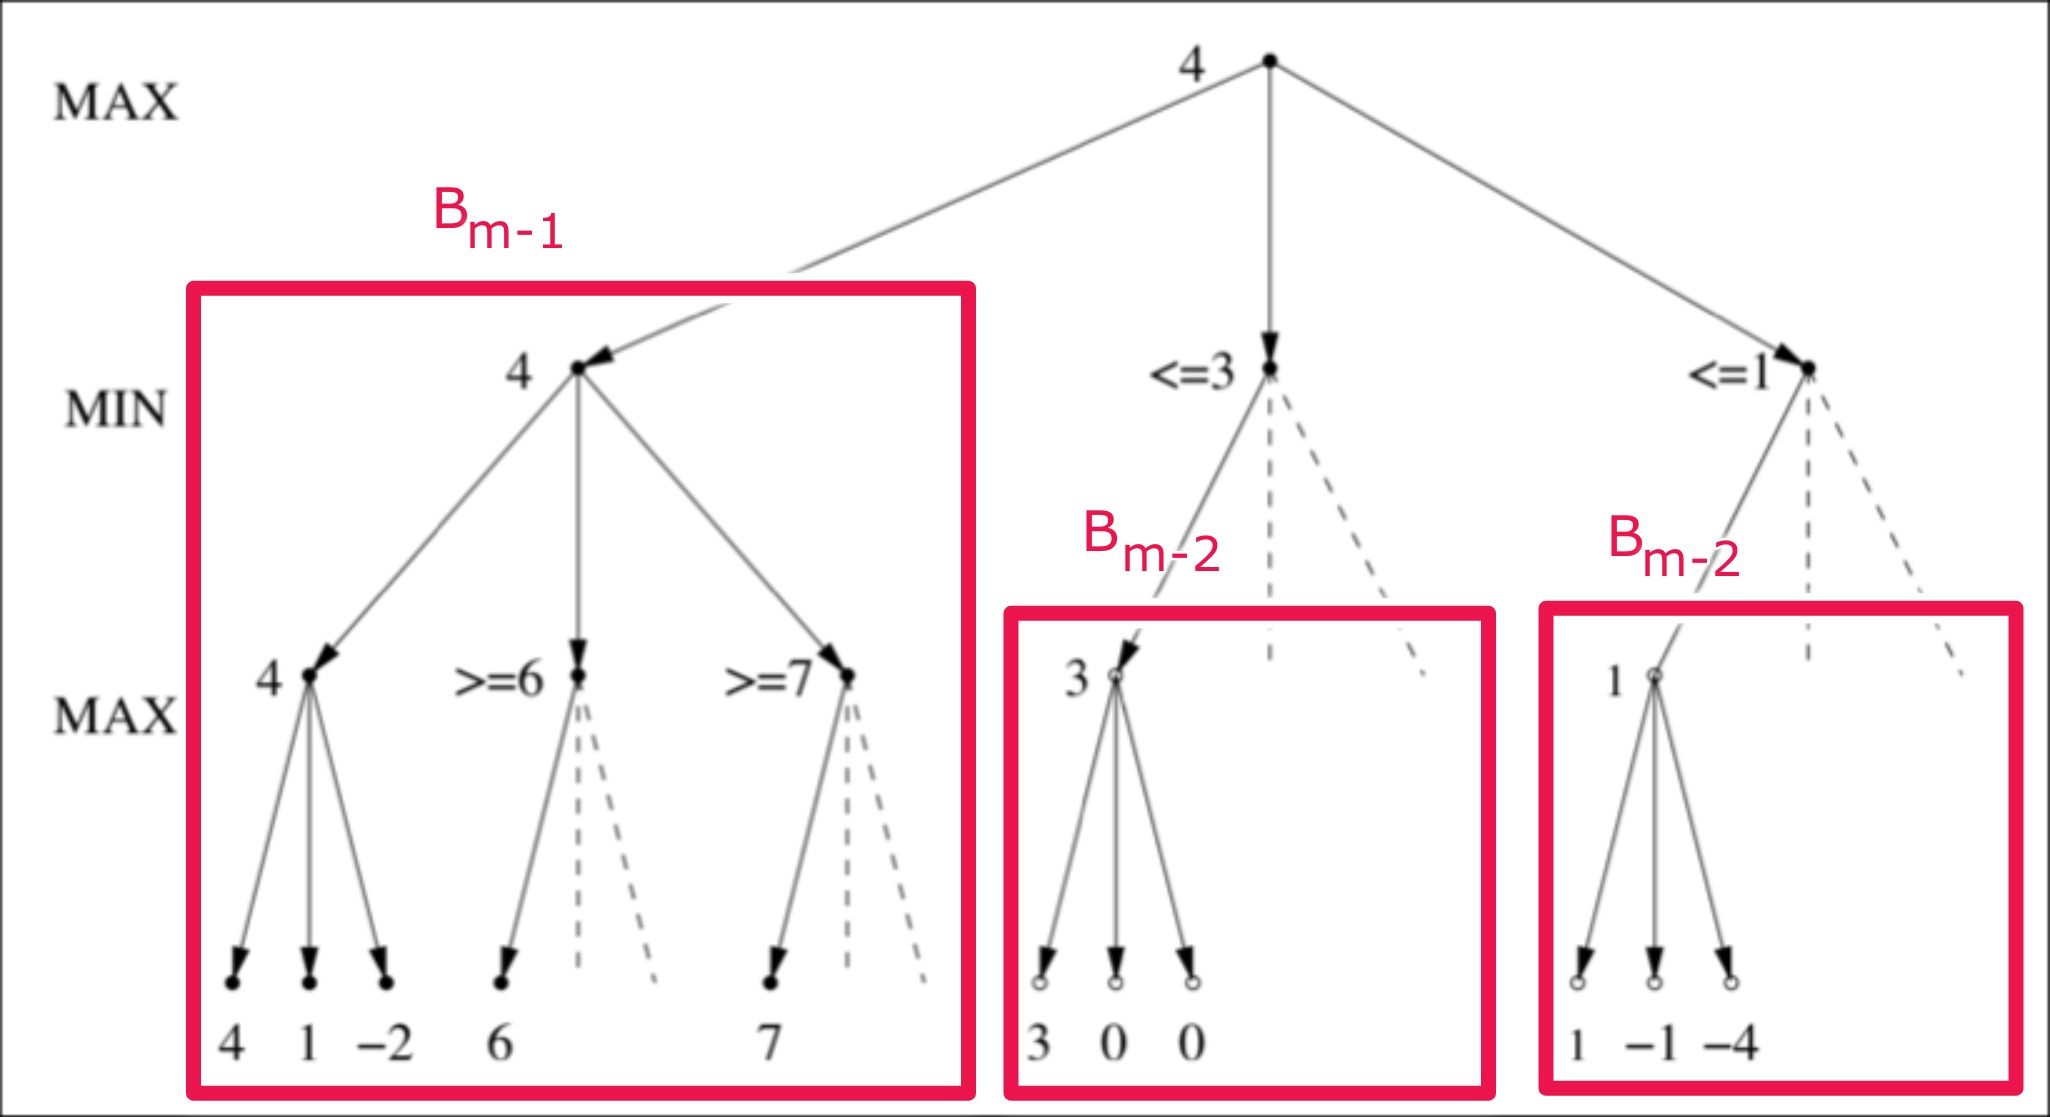

# Uncertain Outcomes
So far in the analysis of games, we have always assumed there are only two types of moves:
- Our moves, in which we try to maximize our overall gain.
- Opponent's move, in which an adversary chooses a move that minimizes our gain.

Take the following example:

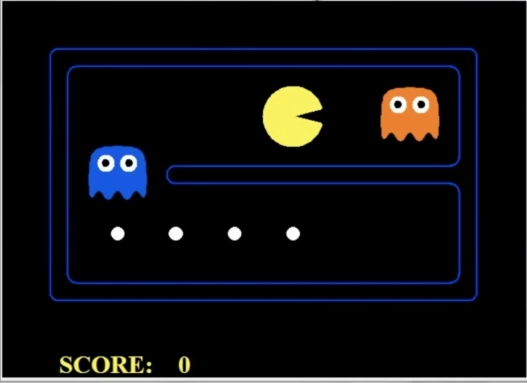

As you can see in the picture above, if the ghosts play perfectly PacMan can never win. So using the Minimax approach causes him to despair and go right to commit suicide in order to minimize wasted time!<br>
But the ghosts may not be as smart as they look and play randomly. In this case pacman could be able to win if the blue one takes the wrong decision and goes down and then right.

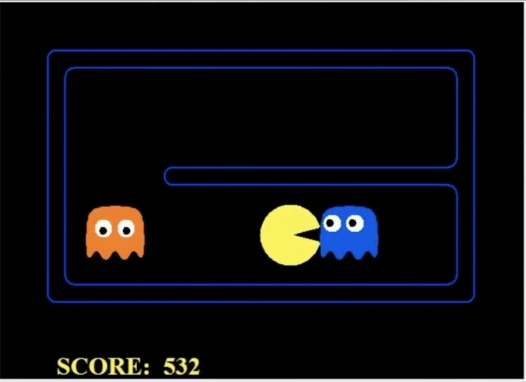

## Expectimax Search
In some cases the outcome cannot be determined exactly and is chance based. For example:
- Rolling a dice
- Unpredictable opponents: Naive opponents or those with limited resources.
- Possibility of failure: Wheels slipping when moving a robot.

Such situations are shown by Expectation Nodes in game trees and are depicted by circles, in which the next move is chosen according to certain probabilites for each of the child nodes. We should compute value for average cases instead of worst cases in these nodes.

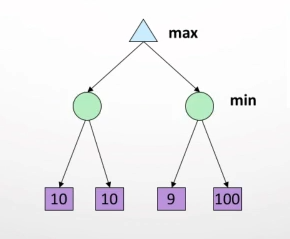

Formalizing the underlying uncertain-result problems as a Markov Decision Process will be discussed in future lectures.

## Expectimax Example

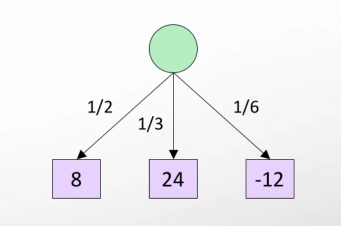

$v = (1/2)  (8) + (1/3)  (24) + (1/6)  (12)$

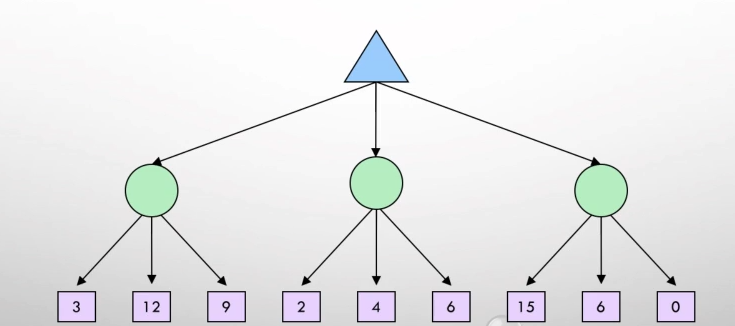
<br>Calculating value for each of the expectation nodes:
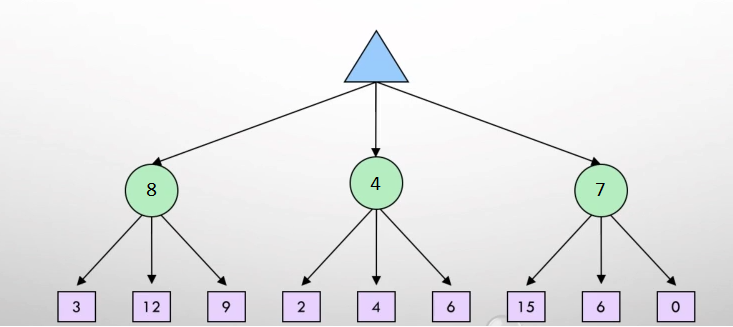
<br>Setting the maximum value of the child nodes for the Max node
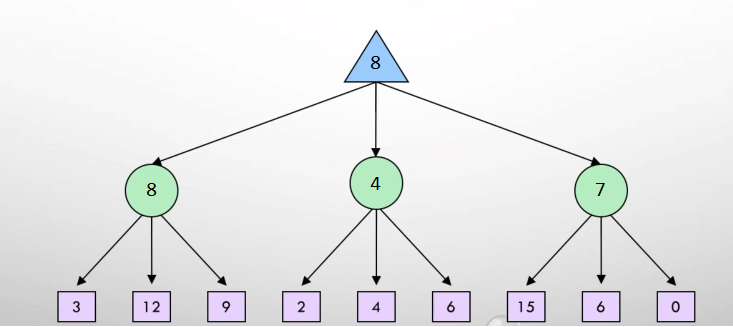

## Expectimax Pruning

An Expectimax tree can be pruned only if there is a known upperbound for the unseen nodes. Here is why:

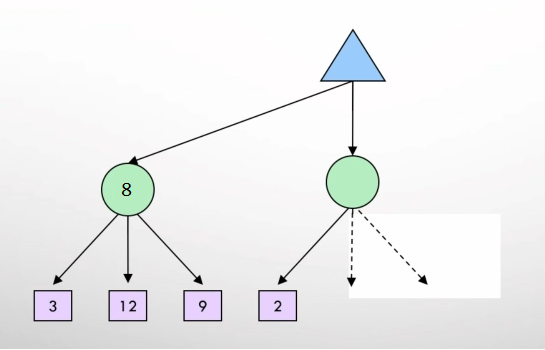

If the specified branches are pruned without knowing an upperbound, the remaining values could be high enough to be a valid choice:

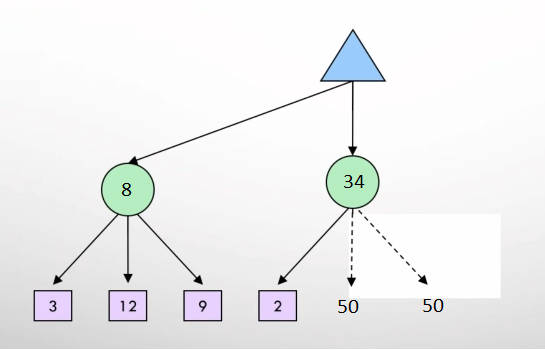

But we know the value of the remaining branches is not higher than 10, the expected outcome could be at best $(2 + 10 + 10)/3 = 22/3 < 8$. So we will be able to can prune those branches:

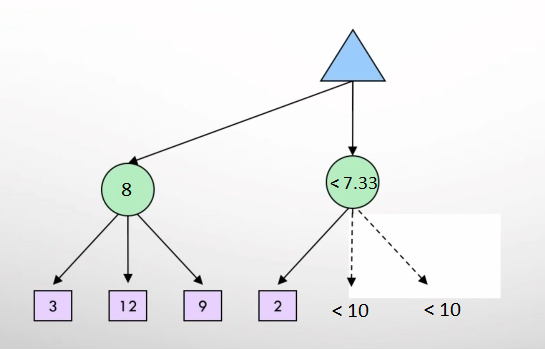

## Depth-Limited Expectimax
Calculating exact Expectimax values can be overly time consuming in some trees, instead it is possible to estimate the values at nodes deeper than a certain amount:

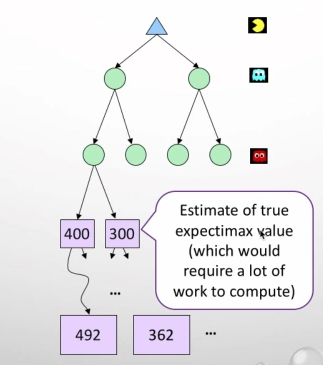

## Informed Probabilities
Take an opponent who moves according to a depth 2 minimax 80% of the time, and randomly in the remaining 20%. That can also be shown by an Expectimax tree.

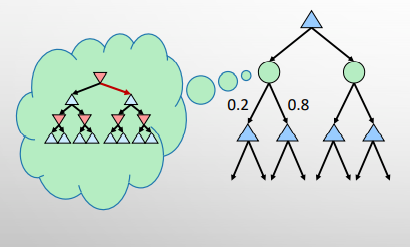

In the above tree, we have to run a simulation of the opponent and run a depth 2 minimax which node the opponent goes to 80% of the time. These calculations can get very slow very quickly.

## The Dangers of Optimism and Pessimism
- Dangerous Optimism: Assuming chance when the world is adversarial
- Dangerous Pessimism: Assuming the worst case when it is not likely

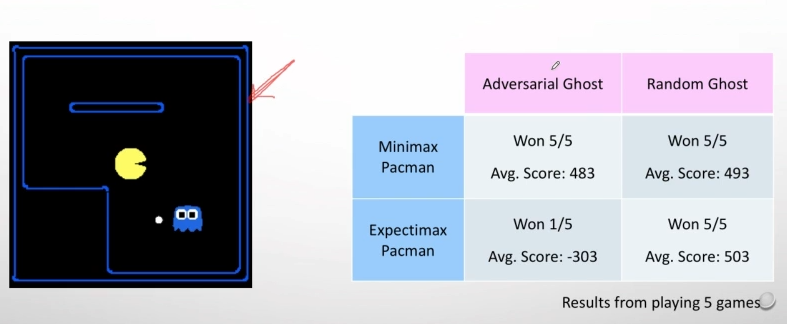

In the figure above, you can see the result of 5 games of PacMan. The result of expecting the ghost to move randomly while in fact it is moving adversarially is an extremely low score whereas the reward is only slightly higher when using Expectimax in case of a randomly moving ghost compared to Minimax.

# Other Game Types

## Mixed Layer Types
In these types of games, the players are able to find and choose the best possible move, but there is a random factor in play that also affects the gameplay. Take Backgammon for example:
- Each player has to roll a dice before making a move.
- The result of dice determines possible moves for each player.
- Each player can evaluate and choose the best move between the possible moves.

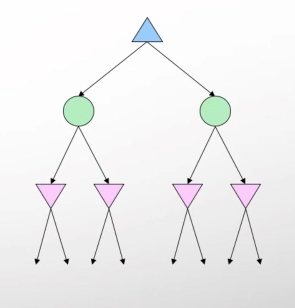

There are 21 possible rolls with 2 dice and approximately 20 legal moves in the game of Backgammon. So a depth 2 tree has $20(21 \times 20)^3 = 1.2 \times 10^9$ leaves.<br>
And as depth increases, the probability of reaching a given search node shrinks. As a result, continuing search will be less useful and depth limiting will be less damaging. But pruning becomes trickier.<br>
Td-Gammon is a computer backgammon program developed in 1992. It uses a depth 2 search, a very good evaluation function and reinforcement learning and is able to perform at world champion level. TD-Gammon was the first AI champion in any game!

## Multi-Agent Utilities
In games with multiple players, terminals have utility n-tuples and each player tries to maximize his own component. This can make cooperation strategies viable.

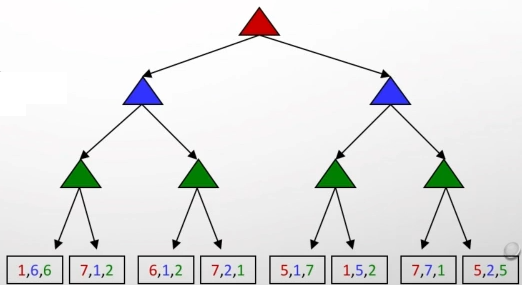

## Summary
Adverserial Search is used when there are other agents in play, probably with conflicting objectives as in most games. Here, we are interested in finding a **Strategy of Playing** that determines which action we should take in different possible scenarios.

Games can be classified into two main categories based on utility functions:
- Zero-sum Games: agents have opposite utilities (pure competition)
- General Games:  independent utilities (cooperation may be beneficial)

We can represent possible game states using Game Trees with the initial state as the root node. Each node is followed by its children, representing different actions. Therefore terminal states are the leaf nodes.

Optimal strategy against an opponent playing perfectly can be found using **Minimax** algorithm. We can also determine a minimum payoff that can be achieved in every game.
A complete search is often infeasible in minimax due to resource limits. So we can:
- Replace the utility function with an **Evaluation Function** that estimates utility.
- Do **Minimax Pruning**: While calculating minimax values, it is sometimes possible to detect and "prune" some suboptimal branches.

Uncertain factors (like rolling dice) are represented by Expectation Nodes in a game tree. Optimal strategy in such games can be found using **Expectimax Search**.

**Final Note**: While we are looking for a good strategy of playing, Optimism and Pessimism can both result in suboptimal behaviour so it's important to evaluate each problem realistically.